In [ ]:
## 1 Užduotis

Duota prekių pirkimo duomenų rinkinys, kuriame kiekvienas vartotojas yra nurodytas su jo pirkimo istorija (pavyzdžiui, pirkimo suma, pirkimo dažnis, kategorija, pirkimo data ir kt.). Užduotis yra suskirstyti vartotojus į klasterius pagal jų pirkimo elgesį.

Duomenų pavyzdys:

Vartotojas 1: {suma: 100€, dažnis: 3 kartai per mėn., kategorija: elektronika, data: 2023-01-15}
Vartotojas 2: {suma: 50€, dažnis: 1 kartą per savaitę, kategorija: maistas, data: 2023-01-20}
Vartotojas 3: {suma: 200€, dažnis: 2 kartus per mėn., kategorija: drabužiai, data: 2023-02-10}
ir tt.
Galimi sprendimo variantai:

Naudojant hierarchinį klasterizavimą, vartotojai gali būti suskirstyti į klasterius pagal jų pirkimo elgesį ir panašumus.
Atlikus klasterizavimą, galima analizuoti kiekvieno klasterio charakteristikas ir nustatyti, kokio tipo klientai dominuoja kiekviename klasteryje.

P.S. duomenų susikūrimui galite naudoti make_blobs(), kurią importuosite iš sklearn.datasets arba tiesiog aprasykite ranka

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

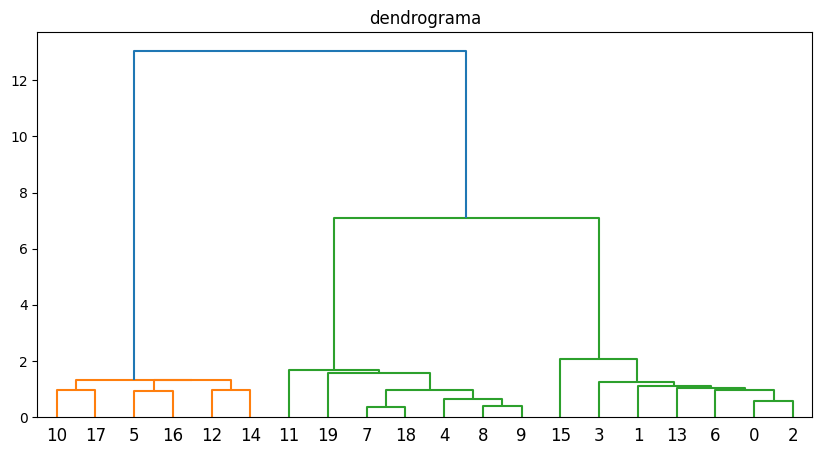

In [18]:
X, labels = make_blobs(n_samples=20, centers=3, n_features=2, random_state=42)
# print(X) 
# print(_)
linked = linkage(X,'single')
plt.figure(figsize=(10,5))
dendrogram(linked, orientation='top', labels=None)
plt.title('dendrograma')
# plt.legend()
plt.show()

# plt.scatter(X[:,0], X[:,1])
# plt.show()


[[ 0.86266219 -0.3374832 ]
 [-0.21566555 -0.45385671]
 [-1.29399328  1.98998712]
 [ 1.40182605 -0.57023023]
 [-0.75482941 -0.62841699]]


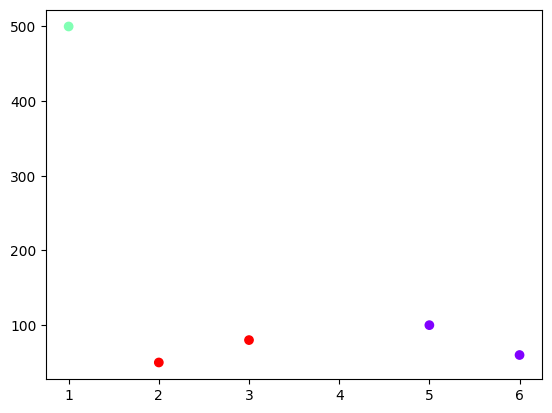

In [30]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

duomenys = np.array([[5, 100],
            [3, 80],
            [1, 500],
            [6, 60],
            [2, 50]])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(duomenys)
print(scaled_data)

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster = model.fit_predict(scaled_data)
plt.scatter(duomenys[:,0], duomenys[:,1], c=cluster, cmap='rainbow')
plt.show()
# plt.scatter(duomenys[:,0], duomenys[:,1])
# plt.show()

In [ ]:
## 2 Užduotis


Užduotis 2: K-vidurkių klasterizavimo užduotis

Duota gyventojų duomenų rinkinys, kuriame kiekvienas gyventojas yra nurodytas su jo amžiumi ir pajamomis. Užduotis yra suskirstyti gyventojus į klasterius pagal jų amžių ir pajamas.

Duomenų pavyzdys:

Gyventojas 1: {amžius: 35 metai, pajamos: 30000€}
Gyventojas 2: {amžius: 50 metai, pajamos: 45000€}
Gyventojas 3: {amžius: 25 metai, pajamos: 25000€}
ir tt.
Galimi sprendimo variantai:

Naudojant K-vidurkių klasterizavimą, gyventojai gali būti suskirstyti į klasterius pagal jų amžių ir pajamas.
Po klasterizavimo galima vizualizuoti klasterius ir jų centroidus, kad būtų lengviau interpretuoti gautus rezultatus.

c:\Users\edita\Documents\KURSAI\240319DMO492DIE\mokymai\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\edita\Documents\KURSAI\240319DMO492DIE\mokymai\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


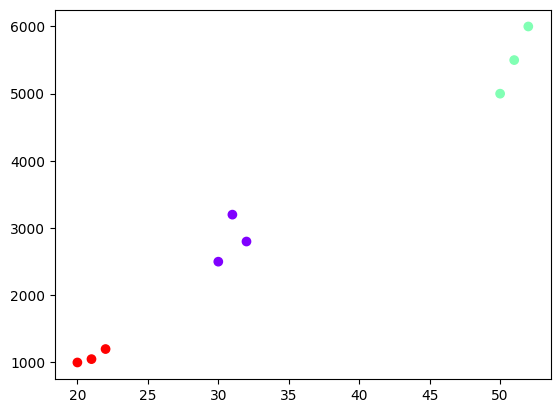

In [35]:
from sklearn.cluster import KMeans
klientai = np.array([[20, 1000],
                     [21, 1050],
                     [22, 1200],
                     [30, 2500],
                     [32, 2800],
                     [31, 3200],
                     [50, 5000],
                     [52, 6000],
                     [51, 5500]])
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(klientai)
plt.scatter(klientai[:,0], klientai[:,1], c=clusters, cmap='rainbow')
plt.show()
# plt.scatter(klientai[:,0], klientai[:,1])
# plt.show()

In [ ]:
## 3 Užduotis

Duota GPS sekimo duomenų rinkinys, kuriame yra įrašyti automobilių judėjimo taškai miesto centre. Užduotis yra identifikuoti pagrindinius automobilių maršrutus pagal duomenų taškų tankumą.

Duomenų pavyzdys:

Taškas 1: {lat: 54.6789, lon: 25.2798, laikas: 2023-01-15 08:00:00}
Taškas 2: {lat: 54.6890, lon: 25.2900, laikas: 2023-01-15 08:10:00}
Taškas 3: {lat: 54.6830, lon: 25.2750, laikas: 2023-01-15 08:20:00}
ir tt.
Galimi sprendimo variantai:

Naudodami DBSCAN klasterizavimą, galima identifikuoti pagrindinius automobilių maršrutus miesto centre pagal taškų tankumą.

In [40]:
import pandas as pd
latitude  =  np.random.uniform(53, 55, 100)
longitude = np.random.uniform(23, 25, 100)
data = {'latitude':latitude, 'longitude':longitude}
df = pd.DataFrame(data)
df.to_csv('kordinates.csv', index=False)

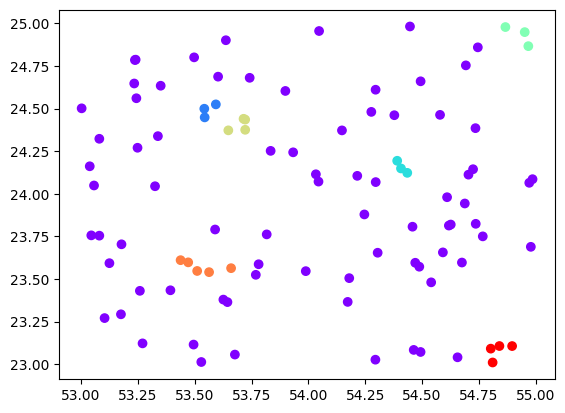

In [42]:
from sklearn.cluster import DBSCAN
# data = np.array([[54.6789, 25.2798],
#                  [54.6890, 25.2900],
#                  [54.6830, 25.2750],
#                  [54.6750, 25.2800],
#                  [54.]]) #sukuriame matricą

df = pd.read_csv('kordinates.csv')

dbscan = DBSCAN(eps=0.1, min_samples=3)
cluster = dbscan.fit_predict(df)

plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster, cmap='rainbow')
plt.show()

